## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import os, sys
sys.path.insert(1, os.path.relpath("../functions"))
from fitting import *
from filtering import *

_FOLDER = "../data/"
_FOLDER_2 = "../figures/"
_FOLDER_3 = "../results/"
SAVE_FIGURES = False

## Fitting data

In [2]:
drug_curves = pd.read_csv(_FOLDER+"normalised_dose_response_data.csv")

conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]

## Comparison of fitting models

In [3]:
functions = [
             "fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"]

### Which function gives the best fitting?

In [4]:
%%time
df_123_04 = filtering_sigmoid_curves(drug_curves, filtering_scenario=[1,2,3], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

compare_fitting_functions(df_123_04, functions, conc_columns, response_norm)

Original dataset: (225384, 44)


  0%|          | 0/2776 [00:00<?, ?it/s]

1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)
3d stage filtration (Specified location of the plateus): Filtered dataset: (2776, 46)
(2776, 46)

 fsigmoid


  2%|▏         | 44/2776 [00:00<00:06, 438.64it/s]

<function fsigmoid at 0x7ffe7f2cc9d8>

 sigmoid_2_param


  1%|          | 32/2776 [00:00<00:08, 318.97it/s]

<function sigmoid_2_param at 0x7ffe7f2cc950>

 sigmoid_3_param


  1%|          | 30/2776 [00:00<00:09, 296.38it/s]

<function sigmoid_3_param at 0x7ffe7f2cca60>

 sigmoid_4_param


  1%|          | 22/2776 [00:00<00:12, 219.84it/s]

<function sigmoid_4_param at 0x7ffe7f2ccae8>

 logistic_4_param


  1%|          | 19/2776 [00:00<00:15, 179.85it/s]

<function logistic_4_param at 0x7ffe7f2ccc80>

 ll4_4_param


  1%|          | 22/2776 [00:00<00:12, 213.35it/s]

<function ll4_4_param at 0x7ffe7f2ccb70>

 ll4R_4_param


  1%|          | 20/2776 [00:00<00:14, 189.45it/s]

<function ll4R_4_param at 0x7ffe7f2ccbf8>

 logLogist_3_param


100%|██████████| 2776/2776 [00:09<00:00, 288.87it/s]


<function logLogist_3_param at 0x7ffe7f2ccd08>




,best_fitting_count,min,max,r2>0,r2>0.8,r2>0.9,r2>0.99
fsigmoid,0.0,4.051079e-01,0.999899,2776.0,2709.0,2472.0,2472.0
sigmoid_2_param,0.0,4.051077e-01,0.999899,2776.0,2709.0,2472.0,2472.0
sigmoid_3_param,3.0,4.169985e-01,0.999926,2776.0,2759.0,2702.0,2702.0
sigmoid_4_param,1122.0,-4.195295e-07,0.999981,2755.0,2721.0,2703.0,2703.0
logistic_4_param,302.0,4.033435e-01,0.999981,2776.0,2761.0,2739.0,2739.0
ll4_4_param,265.0,4.035149e-01,0.999981,2776.0,2761.0,2740.0,2740.0
ll4R_4_param,278.0,9.126042e-08,0.999981,2776.0,2759.0,2735.0,2735.0
logLogist_3_param,806.0,4.683318e-01,0.999978,2776.0,2760.0,2734.0,2734.0



Examples of bad fitting with sigmoid_4_param (r2<0.61): 46


,COSMIC_ID,DRUG_ID,fsigmoid_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
570,910851,170,0.991346,0.991346,0.995994,0.000000e+00,0.998188,0.998188,0.998188,0.997637,ll4_4_param
2311,1290724,268,0.948049,0.948049,0.985379,2.473649e-08,0.992273,0.992273,0.992273,0.989404,logistic_4_param
134042,910700,83,0.482058,0.482058,0.539801,5.493351e-01,0.549078,0.552771,0.552771,0.536839,ll4_4_param
3576,907064,180,0.988098,0.988098,0.996652,3.555965e-08,0.997866,0.997866,0.997866,0.997858,ll4R_4_param
6957,1240150,180,0.781777,0.781777,0.957028,8.791738e-10,0.981340,0.981340,0.981340,0.981363,logLogist_3_param


CPU times: user 1min 5s, sys: 3.34 s, total: 1min 9s
Wall time: 1min 13s


,Unnamed: 0,CELL_LINE_NAME,COSMIC_ID,DRUG_ID,DRUGID_COSMICID,FOLD_DILUTION,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,...,sigmoid_4_param,logistic_4_param_r2,logistic_4_param,ll4_4_param_r2,ll4_4_param,ll4R_4_param_r2,ll4R_4_param,logLogist_3_param_r2,logLogist_3_param,better_fitting
131120,131120,RT-112,909704,308,308_909704,2,5.120,0,0.111111,0.222222,...,"[0.5388407101879351, 1.0220900365062462, -9.91...",0.993608,"[0.9499440222036498, 5.265479350113211, 0.5498...",0.993608,"[0.5498776871869252, 0.9499671273390975, 5.262...",0.993608,"[-3.1485463193774037, 0.9499346064095069, 5.26...",0.996330,"[-0.2730232757001648, -3.0751168846767736, 0.0...",sigmoid_4_param
60,60,NMC-G1,908449,157,157_908449,2,5.120,0,0.111111,0.222222,...,"[0.44916330528823867, 1.6141738404728152, -11....",0.978230,"[0.9760242387663421, 5.344787715121362, 0.4950...",0.978230,"[0.4950055057252244, 0.9760268376801783, 5.344...",0.978230,"[-3.75865202541188, 0.9760210302353007, 5.3450...",0.977584,"[-0.31193681085226505, -3.743764860967184, 0.3...",sigmoid_4_param
85,85,NMC-G1,908449,170,170_908449,2,16.000,0,0.111111,0.222222,...,"[0.5765692420823216, 1.057662608448003, -29.29...",0.997801,"[0.9680061035648554, 17.35700335698762, 0.5773...",0.997801,"[0.5774000844520921, 0.9680086022395827, 17.35...",0.997801,"[-9.531430728153335, 0.9680080430738064, 17.35...",0.995329,"[-0.23833516322333678, -8.324890823123262, 0.0...",ll4R_4_param
131171,131171,SBC-3,753610,135,135_753610,2,1.024,0,0.111111,0.222222,...,"[0.28074939111766495, 1.0142226726079246, -14....",0.997515,"[1.003472745532983, 4.056254626734951, 0.28126...",0.997515,"[0.28126191496167485, 1.0034873841392906, 4.05...",0.997515,"[-5.14457571692183, 1.003487815474793, 4.05576...",0.997399,"[-0.5426272034188002, -5.25838888528962, 0.053...",ll4R_4_param
112,112,NMC-G1,908449,331,331_908449,2,10.240,0,0.111111,0.222222,...,"[0.5298126208219924, 1.2484879660399013, -10.3...",0.987341,"[0.9660489414392239, 5.499998145333257, 0.5592...",0.987341,"[0.559215030741002, 0.9660167132931493, 5.5035...",0.987341,"[-3.2003483194365345, 0.9659922340993805, 5.50...",0.993016,"[-0.26379238134562094, -3.2640737010503202, 0....",logLogist_3_param
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130643,130643,DB,906832,173,173_906832,2,32.000,0,0.111111,0.222222,...,"[0.7009035325597803, 1.0857667771616113, -24.7...",0.994765,"[0.9538518129133037, 18.202109932063415, 0.703...",0.994765,"[0.7030048035913561, 0.9538463978062721, 18.20...",0.994765,"[-6.416199024563913, 0.9538439927006769, 18.20...",0.992120,"[-0.15391645014987543, -4.9077358533114905, 0....",sigmoid_4_param
130792,130792,HEL,907053,282,282_907053,2,2.500,0,0.111111,0.222222,...,"[0.37648878670093167, 1.0276203656041658, -6.9...",0.992649,"[0.9939681258670652, 2.7068418779699615, 0.422...",0.992649,"[0.4224512961768246, 0.9939315888298301, 2.708...",0.992649,"[-2.33191259159534, 0.9939591038398309, 2.7069...",0.990073,"[-0.39897024843272316, -2.9031687975418476, 0....",ll4R_4_param
130905,130905,DG-75,906838,219,219_906838,2,10.240,0,0.111111,0.222222,...,"[0.335618070252703, 1.447503365424917, -32.531...",0.999467,"[0.984302837081754, 12.760155753946105, 0.3455...",0.999467,"[0.3455431269237231, 0.9843038243811012, 12.75...",0.999467,"[-13.555232068175291, 0.9843047570022433, 12.7...",0.999151,"[-0.46072669395670707, -11.16258051602129, 0.2...",sigmoid_4_param
130920,130920,LOXIMVI,905974,272,272_905974,2,5.120,0,0.111111,0.222222,...,"[0.6682109926590216, 1.08264381562275, -13.453...",0.995683,"[0.9665638803468148, 8.610632031168175, 0.6765...",0.995683,"[0.6765943712466973, 0.9665863059468612, 8.606...",0.995683,"[-3.3641468159146326, 0.9665753474786415, 8.61...",0.996278,"[-0.17427757396255364, -3.4285686412115886, 0....",sigmoid_4_param


In [5]:
%%time
df_123_02 = filtering_sigmoid_curves(drug_curves, filtering_scenario=[1,2,3], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.2)

compare_fitting_functions(df_123_02, functions, conc_columns, response_norm)

Original dataset: (225384, 44)


  3%|▎         | 69/2152 [00:00<00:03, 687.63it/s]

1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)
3d stage filtration (Specified location of the plateus): Filtered dataset: (2152, 46)
(2152, 46)


  3%|▎         | 74/2152 [00:00<00:02, 734.64it/s]

<function fsigmoid at 0x7f86253c7598>


  2%|▏         | 50/2152 [00:00<00:04, 491.54it/s]

<function sigmoid_2_param at 0x7f86253c7510>


  2%|▏         | 43/2152 [00:00<00:04, 429.58it/s]

<function sigmoid_3_param at 0x7f86253c7620>


  2%|▏         | 42/2152 [00:00<00:05, 417.61it/s]

<function sigmoid_4_param at 0x7f86253c76a8>


  2%|▏         | 35/2152 [00:00<00:06, 343.92it/s]

<function logistic_4_param at 0x7f86253c7840>


  2%|▏         | 36/2152 [00:00<00:05, 355.00it/s]

<function ll4_4_param at 0x7f86253c7730>


  1%|▏         | 32/2152 [00:00<00:06, 312.69it/s]

<function ll4R_4_param at 0x7f86253c77b8>


100%|██████████| 2152/2152 [00:06<00:00, 336.80it/s]

<function logLogist_3_param at 0x7f86253c78c8>



,best_fitting_count,min,max,r2>0,r2>0.8,r2>0.9
fsigmoid,0.0,4.602484e-01,0.999899,2152.0,2135.0,2074.0
sigmoid_2_param,0.0,4.602485e-01,0.999899,2152.0,2135.0,2074.0
sigmoid_3_param,3.0,5.922767e-01,0.999926,2152.0,2139.0,2118.0
sigmoid_4_param,899.0,-4.195295e-07,0.999981,2133.0,2105.0,2094.0
logistic_4_param,218.0,6.016469e-01,0.999981,2152.0,2141.0,2126.0
ll4_4_param,195.0,6.016469e-01,0.999981,2152.0,2141.0,2127.0
ll4R_4_param,204.0,9.126042e-08,0.999981,2152.0,2139.0,2122.0
logLogist_3_param,633.0,4.998448e-01,0.999978,2152.0,2140.0,2122.0



Examples of bad fitting with sigmoid_4_param (r2<0.61): 39


,COSMIC_ID,DRUG_ID,fsigmoid_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
570,910851,170,0.991346,0.991346,0.995994,0.000000e+00,0.998188,0.998188,0.998188,0.997637,ll4_4_param
2311,1290724,268,0.948049,0.948049,0.985379,2.473649e-08,0.992273,0.992273,0.992273,0.989404,logistic_4_param
3576,907064,180,0.988098,0.988098,0.996652,3.555965e-08,0.997866,0.997866,0.997866,0.997858,ll4R_4_param
138632,949174,272,0.728071,0.728071,0.878181,1.551885e-08,0.898704,0.898704,0.898704,0.898869,logLogist_3_param
7905,910549,272,0.589601,0.589601,0.592277,6.034818e-01,0.602828,0.603021,0.602919,0.597047,sigmoid_4_param


CPU times: user 42.6 s, sys: 1.77 s, total: 44.4 s
Wall time: 43.7 s


In [6]:
%%time
df_1234_04 = filtering_sigmoid_curves(drug_curves, filtering_scenario=[1,2,3,4], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, 
                        last_points_upper_limit = 0.4, 
                        middle_points_limit = -0.2)

compare_fitting_functions(df_1234_04, functions, conc_columns, response_norm)

Original dataset: (225384, 44)


  3%|▎         | 72/2719 [00:00<00:03, 716.16it/s]

1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)
3d stage filtration (Specified location of the plateus): Filtered dataset: (2776, 46)
4th stage filtration (Cut off high ancedent points): Filtered dataset: (2719, 46)
(2719, 46)


  2%|▏         | 67/2719 [00:00<00:03, 666.17it/s]

<function fsigmoid at 0x7f86253c7598>


  2%|▏         | 53/2719 [00:00<00:05, 523.88it/s]

<function sigmoid_2_param at 0x7f86253c7510>


  2%|▏         | 43/2719 [00:00<00:06, 428.95it/s]

<function sigmoid_3_param at 0x7f86253c7620>


  2%|▏         | 42/2719 [00:00<00:06, 411.53it/s]

<function sigmoid_4_param at 0x7f86253c76a8>


  1%|          | 32/2719 [00:00<00:08, 313.67it/s]

<function logistic_4_param at 0x7f86253c7840>


  1%|          | 33/2719 [00:00<00:08, 324.88it/s]

<function ll4_4_param at 0x7f86253c7730>


  1%|▏         | 36/2719 [00:00<00:07, 353.97it/s]

<function ll4R_4_param at 0x7f86253c77b8>


100%|██████████| 2719/2719 [00:08<00:00, 337.15it/s]


<function logLogist_3_param at 0x7f86253c78c8>



,best_fitting_count,min,max,r2>0,r2>0.8,r2>0.9
fsigmoid,0.0,4.503432e-01,0.999899,2719.0,2671.0,2456.0
sigmoid_2_param,0.0,4.503431e-01,0.999899,2719.0,2671.0,2456.0
sigmoid_3_param,2.0,8.127070e-01,0.999926,2719.0,2719.0,2681.0
sigmoid_4_param,1109.0,-4.195295e-07,0.999981,2699.0,2680.0,2675.0
logistic_4_param,292.0,8.453735e-01,0.999981,2719.0,2719.0,2712.0
ll4_4_param,257.0,8.453634e-01,0.999981,2719.0,2719.0,2712.0
ll4R_4_param,269.0,9.126042e-08,0.999981,2719.0,2717.0,2708.0
logLogist_3_param,790.0,8.272879e-01,0.999978,2719.0,2719.0,2707.0



Examples of bad fitting with sigmoid_4_param (r2<0.61): 39


,COSMIC_ID,DRUG_ID,fsigmoid_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
155787,1287706,1014,0.882047,0.882047,0.983959,2.261360e-09,0.995356,0.995356,0.995356,0.987962,ll4_4_param
570,910851,170,0.991346,0.991346,0.995994,0.000000e+00,0.998188,0.998188,0.998188,0.997637,ll4_4_param
74484,724878,268,0.982274,0.982274,0.993826,2.606711e-08,0.995748,0.995748,0.995748,0.995376,logistic_4_param
82744,907172,344,0.998927,0.998927,0.999046,-1.189043e-08,0.999478,0.999478,0.999478,0.999058,ll4_4_param
107980,909706,182,0.971662,0.971662,0.988824,-1.532584e-08,0.994402,0.994402,0.994402,0.990529,ll4_4_param


CPU times: user 53.3 s, sys: 2.19 s, total: 55.5 s
Wall time: 54.6 s


In [7]:
%%time
df_1234_02 = filtering_sigmoid_curves(drug_curves, filtering_scenario=[1,2,3,4], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, 
                        last_points_upper_limit = 0.2,
                        middle_points_limit = -0.2)

compare_fitting_functions(df_1234_02, functions, conc_columns, response_norm)

Original dataset: (225384, 44)


  3%|▎         | 64/2108 [00:00<00:03, 632.32it/s]

1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)
3d stage filtration (Specified location of the plateus): Filtered dataset: (2152, 46)
4th stage filtration (Cut off high ancedent points): Filtered dataset: (2108, 46)
(2108, 46)


  4%|▎         | 76/2108 [00:00<00:02, 758.43it/s]

<function fsigmoid at 0x7f86253c7598>


  2%|▏         | 49/2108 [00:00<00:04, 488.64it/s]

<function sigmoid_2_param at 0x7f86253c7510>


  2%|▏         | 43/2108 [00:00<00:04, 427.33it/s]

<function sigmoid_3_param at 0x7f86253c7620>


  2%|▏         | 37/2108 [00:00<00:05, 362.11it/s]

<function sigmoid_4_param at 0x7f86253c76a8>


  1%|▏         | 31/2108 [00:00<00:06, 305.66it/s]

<function logistic_4_param at 0x7f86253c7840>


  2%|▏         | 32/2108 [00:00<00:06, 314.78it/s]

<function ll4_4_param at 0x7f86253c7730>


  2%|▏         | 34/2108 [00:00<00:06, 338.80it/s]

<function ll4R_4_param at 0x7f86253c77b8>


100%|██████████| 2108/2108 [00:06<00:00, 342.47it/s]

<function logLogist_3_param at 0x7f86253c78c8>



,best_fitting_count,min,max,r2>0,r2>0.8,r2>0.9
fsigmoid,0.0,7.768212e-01,0.999899,2108.0,2105.0,2058.0
sigmoid_2_param,0.0,7.768212e-01,0.999899,2108.0,2105.0,2058.0
sigmoid_3_param,2.0,8.127070e-01,0.999926,2108.0,2108.0,2098.0
sigmoid_4_param,886.0,-4.195295e-07,0.999981,2090.0,2073.0,2070.0
logistic_4_param,213.0,8.453735e-01,0.999981,2108.0,2108.0,2103.0
ll4_4_param,189.0,8.453634e-01,0.999981,2108.0,2108.0,2103.0
ll4R_4_param,195.0,9.126042e-08,0.999981,2108.0,2106.0,2099.0
logLogist_3_param,623.0,8.272879e-01,0.999978,2108.0,2108.0,2100.0



Examples of bad fitting with sigmoid_4_param (r2<0.61): 35


,COSMIC_ID,DRUG_ID,fsigmoid_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
155787,1287706,1014,0.882047,0.882047,0.983959,2.261360e-09,0.995356,0.995356,0.995356,0.987962,ll4_4_param
570,910851,170,0.991346,0.991346,0.995994,0.000000e+00,0.998188,0.998188,0.998188,0.997637,ll4_4_param
74484,724878,268,0.982274,0.982274,0.993826,2.606711e-08,0.995748,0.995748,0.995748,0.995376,logistic_4_param
82744,907172,344,0.998927,0.998927,0.999046,-1.189043e-08,0.999478,0.999478,0.999478,0.999058,ll4_4_param
107980,909706,182,0.971662,0.971662,0.988824,-1.532584e-08,0.994402,0.994402,0.994402,0.990529,ll4_4_param


CPU times: user 41.8 s, sys: 1.76 s, total: 43.6 s
Wall time: 42.9 s


In [8]:
%%time
df_134_04 = filtering_sigmoid_curves(drug_curves, filtering_scenario=[1,3,4], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4,
                        middle_points_limit =-0.2)

compare_fitting_functions(df_134_04, functions, conc_columns, response_norm)

Original dataset: (225384, 44)


  0%|          | 62/18415 [00:00<00:30, 610.48it/s]

1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
3d stage filtration (Specified location of the plateus): Filtered dataset: (19037, 44)
4th stage filtration (Cut off high ancedent points): Filtered dataset: (18415, 44)
(18415, 44)


  0%|          | 68/18415 [00:00<00:27, 675.74it/s]

<function fsigmoid at 0x7f86253c7598>


  0%|          | 41/18415 [00:00<00:45, 403.85it/s]

<function sigmoid_2_param at 0x7f86253c7510>


  0%|          | 15/18415 [00:00<02:14, 136.67it/s]

<function sigmoid_3_param at 0x7f86253c7620>


  0%|          | 32/18415 [00:00<00:58, 313.19it/s]

<function sigmoid_4_param at 0x7f86253c76a8>


  0%|          | 23/18415 [00:00<01:20, 228.15it/s]

<function logistic_4_param at 0x7f86253c7840>


  0%|          | 25/18415 [00:00<01:14, 247.52it/s]

<function ll4_4_param at 0x7f86253c7730>


  0%|          | 20/18415 [00:00<01:32, 199.85it/s]

<function ll4R_4_param at 0x7f86253c77b8>


100%|██████████| 18415/18415 [01:00<00:00, 305.08it/s]


<function logLogist_3_param at 0x7f86253c78c8>



,best_fitting_count,min,max,r2>0,r2>0.8,r2>0.9
fsigmoid,1.0,2.755202e-01,0.999938,18415.0,17174.0,14274.0
sigmoid_2_param,1.0,2.755201e-01,0.999938,18415.0,17172.0,14271.0
sigmoid_3_param,90.0,-2.047581e-04,0.999998,18414.0,18219.0,16928.0
sigmoid_4_param,5843.0,-7.220099e-06,0.999981,17333.0,16350.0,15635.0
logistic_4_param,1733.0,0.000000e+00,0.999981,18414.0,18270.0,17399.0
ll4_4_param,1603.0,0.000000e+00,0.999981,18413.0,18268.0,17396.0
ll4R_4_param,1488.0,-5.176513e-07,0.999981,18411.0,18262.0,17384.0
logLogist_3_param,7656.0,6.058932e-01,0.999996,18415.0,18372.0,17906.0



Examples of bad fitting with sigmoid_4_param (r2<0.61): 1941


,COSMIC_ID,DRUG_ID,fsigmoid_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
131092,909726,252,0.896614,0.896614,0.931205,0.000000e+00,0.947938,0.947661,0.947523,0.965033,logLogist_3_param
131122,753584,222,0.974394,0.974394,0.984243,-7.183103e-09,0.985092,0.985121,0.985073,0.993008,logLogist_3_param
72,908449,273,0.989093,0.989093,0.994160,4.094162e-08,0.995272,0.995272,0.995272,0.991522,logistic_4_param
65611,688010,134,0.921392,0.921392,0.940102,6.746451e-10,0.933921,0.933869,0.933904,0.947732,logLogist_3_param
65620,1330996,235,0.943544,0.943544,0.968856,1.278982e-07,0.969390,0.969390,0.969388,0.962382,logistic_4_param


CPU times: user 7min 7s, sys: 19 s, total: 7min 26s
Wall time: 7min 17s


In [9]:
%%time
df_134_02 = filtering_sigmoid_curves(drug_curves, filtering_scenario=[1,3,4], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, 
                        last_points_upper_limit = 0.2,
                        middle_points_limit = -0.2)

compare_fitting_functions(df_134_02, functions, conc_columns, response_norm)

Original dataset: (225384, 44)


  1%|          | 63/11997 [00:00<00:19, 627.27it/s]

1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
3d stage filtration (Specified location of the plateus): Filtered dataset: (12355, 44)
4th stage filtration (Cut off high ancedent points): Filtered dataset: (11997, 44)
(11997, 44)


  1%|          | 68/11997 [00:00<00:17, 676.23it/s]

<function fsigmoid at 0x7f86253c7598>


  0%|          | 45/11997 [00:00<00:26, 443.95it/s]

<function sigmoid_2_param at 0x7f86253c7510>


  0%|          | 25/11997 [00:00<00:48, 244.99it/s]

<function sigmoid_3_param at 0x7f86253c7620>


  0%|          | 37/11997 [00:00<00:32, 363.75it/s]

<function sigmoid_4_param at 0x7f86253c76a8>


  0%|          | 21/11997 [00:00<00:57, 206.97it/s]

<function logistic_4_param at 0x7f86253c7840>


  0%|          | 26/11997 [00:00<00:46, 255.63it/s]

<function ll4_4_param at 0x7f86253c7730>


  0%|          | 26/11997 [00:00<00:46, 256.27it/s]

<function ll4R_4_param at 0x7f86253c77b8>


100%|██████████| 11997/11997 [00:41<00:00, 286.68it/s]


<function logLogist_3_param at 0x7f86253c78c8>



,best_fitting_count,min,max,r2>0,r2>0.8,r2>0.9
fsigmoid,0.0,2.788415e-01,0.999938,11997.0,11520.0,10282.0
sigmoid_2_param,1.0,2.788415e-01,0.999938,11997.0,11520.0,10282.0
sigmoid_3_param,61.0,-2.047581e-04,0.999998,11996.0,11927.0,11378.0
sigmoid_4_param,4271.0,-4.170810e-06,0.999981,11358.0,10828.0,10556.0
logistic_4_param,1109.0,5.782919e-01,0.999981,11997.0,11958.0,11603.0
ll4_4_param,1031.0,0.000000e+00,0.999981,11996.0,11957.0,11601.0
ll4R_4_param,931.0,-5.176513e-07,0.999981,11994.0,11951.0,11592.0
logLogist_3_param,4593.0,7.085231e-01,0.999996,11997.0,11989.0,11840.0



Examples of bad fitting with sigmoid_4_param (r2<0.61): 1136


,COSMIC_ID,DRUG_ID,fsigmoid_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
131092,909726,252,0.896614,0.896614,0.931205,0.000000e+00,0.947938,0.947661,0.947523,0.965033,logLogist_3_param
98368,908443,225,0.797873,0.797873,0.904829,-3.237209e-08,0.916889,0.916862,0.916749,0.978779,logLogist_3_param
72,908449,273,0.989093,0.989093,0.994160,4.094162e-08,0.995272,0.995272,0.995272,0.991522,logistic_4_param
65639,907053,257,0.819013,0.819013,0.931013,0.000000e+00,0.931033,0.931024,0.931012,0.944819,logLogist_3_param
65655,1290801,346,0.969306,0.969306,0.970429,0.000000e+00,0.985486,0.985486,0.985486,0.973734,ll4R_4_param


CPU times: user 4min 35s, sys: 12 s, total: 4min 47s
Wall time: 4min 44s


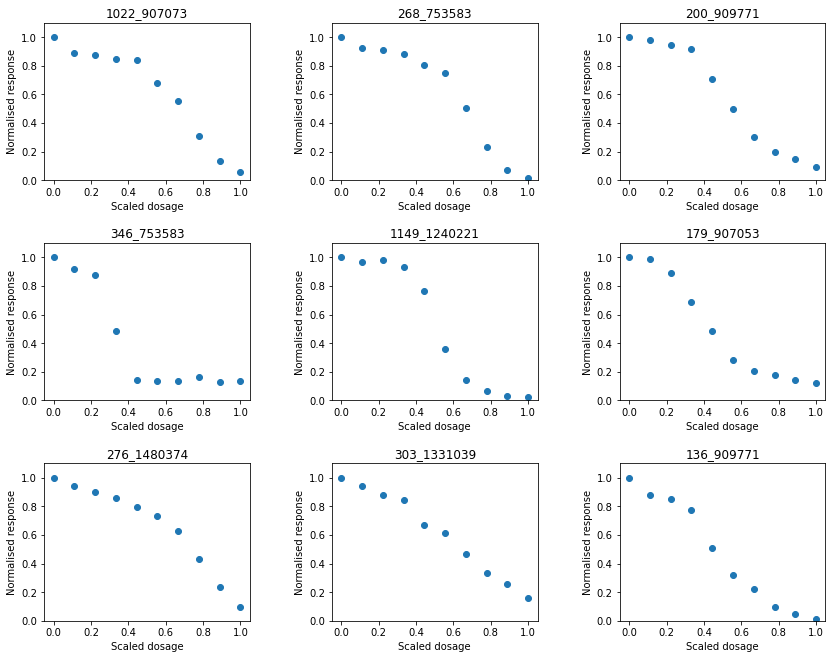

In [10]:
new_df = df_134_02[df_134_02["sigmoid_4_param_r2"]>0.9]
show_response_curves(new_df, plots_in_row=3, plots_in_column=3, \
                   x_columns=conc_columns, y_columns=response_norm, indexes=new_df.index[:9])


### What if don't use any filtering

In [11]:
%%time
compare_fitting_functions(drug_curves, functions, conc_columns, response_norm)

  0%|          | 0/225384 [00:00<?, ?it/s]

(225384, 44)


100%|██████████| 225384/225384 [06:30<00:00, 577.46it/s] 


<function fsigmoid at 0x7f86253c7598>


100%|██████████| 225384/225384 [05:41<00:00, 660.18it/s] 


<function sigmoid_2_param at 0x7f86253c7510>


100%|██████████| 225384/225384 [09:26<00:00, 397.85it/s] 


<function sigmoid_3_param at 0x7f86253c7620>


100%|██████████| 225384/225384 [1:02:44<00:00, 59.88it/s]    


<function sigmoid_4_param at 0x7f86253c76a8>


100%|██████████| 225384/225384 [3:21:50<00:00, 18.61it/s]    


<function logistic_4_param at 0x7f86253c7840>


100%|██████████| 225384/225384 [33:00<00:00, 113.79it/s]   


<function ll4_4_param at 0x7f86253c7730>


100%|██████████| 225384/225384 [1:31:08<00:00, 41.22it/s]    


<function ll4R_4_param at 0x7f86253c77b8>


100%|██████████| 225384/225384 [38:13<00:00, 98.25it/s]   


<function logLogist_3_param at 0x7f86253c78c8>



,best_fitting_count,min,max,r2>0,r2>0.8,r2>0.9
fsigmoid,34024.0,-794.650193,0.999988,154078.0,78135.0,53108.0
sigmoid_2_param,372.0,-8.680730,0.999988,147301.0,78052.0,53016.0
sigmoid_3_param,10074.0,-4.204919,0.999998,189861.0,94438.0,70277.0
sigmoid_4_param,30058.0,-0.051301,0.999981,168543.0,81792.0,65700.0
logistic_4_param,31543.0,-0.030124,0.999999,182648.0,101579.0,78979.0
ll4_4_param,31552.0,-0.046189,1.000000,182050.0,101237.0,78843.0
ll4R_4_param,33135.0,-0.716794,0.999998,183161.0,100964.0,78654.0
logLogist_3_param,54626.0,-7.161534,1.000000,167680.0,94818.0,75034.0



Examples of bad fitting with sigmoid_4_param (r2<0.61): 127328


,COSMIC_ID,DRUG_ID,fsigmoid_r2,sigmoid_2_param_r2,sigmoid_3_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,ll4R_4_param_r2,logLogist_3_param_r2,better_fitting
0,1290922,332,-0.356727,-0.356736,0.019575,2.141371e-02,0.041759,0.041535,0.041783,0.203697,logLogist_3_param
1,1290922,257,0.816939,0.816947,0.878794,-4.012587e-08,0.878716,0.878772,0.878688,0.816946,sigmoid_3_param
4,1290922,192,-0.362288,-0.362288,0.215762,2.154624e-01,0.000000,0.501654,0.501660,0.496301,ll4R_4_param
7,1290922,306,0.717135,0.717145,0.774391,-4.530186e-09,0.774385,0.774389,0.774384,0.717137,sigmoid_3_param
9,1290922,277,0.542245,0.542245,0.147251,-4.932537e-07,0.668754,0.668780,0.668759,0.533027,ll4_4_param


CPU times: user 1h 57min, sys: 7min, total: 2h 4min
Wall time: 7h 28min 42s


### df_123_04 was used in the MSc project

In [12]:
df = df_123_04.copy()